## Evaluation

This notebook demonstrates how to perform an evaluation on all the predictions generated.

In the last notebook we looked at individual predictions that we generated with our tool. Now let's evaluate these predictions on the macroscopic level. 

### Scored
    
There are prediction files for each prompt, and each prediction file has scores for its individual logits in a prediction. To evaluate these predictions, we need to score each logit, and concatenate all these predictions into a single file. To do that, we can use the `scored` method:

#### Parameters:
- outfile: 
    - Path to the output parquet file for loading/saving.
    - If outfile exists, it will be loaded.
    - If None, outfile will not be loaded or saved.
- indir:
    - Path to the directory of prediction parquets, to be loaded and concatenated.
    - If None, indir will be loaded from outfile.
    - If outfile or infile is passed, indir is ignored.
- infile:
    - Path to another scored parquet file. 
    - This is used to subset an existing file.
    - The score name must be the same across the two files.
- score:
    - The score to be used for thresholding.
- compare:
    - Additional scores, which are not thresholded on
    - These are used for comparison.
- score_threshold:
    - Threshold for the score.
- force:
    - Even if outfile exists, overwrite the outfile, using indir or infile.
- strict:
    - Restrict predictions to only ones with prompts currently in ELSA's set of prompts.
    - This is for loading a subset of predictions, when all predictions' prompts are not in the ELSA prompts.
- multiprocessing:
    - Uses multiple cores for loading and scoring predictions.
    - False can help with debugging or memory limitations.
- check:
    - checks that prediction prompts have the same identifiers (iclass, ilabels) as the ELSA prompts.

#### Columns
 - score:
    - The value of the aggregate score for each prediction.
- score_name:
    - The name of the score used to threshold the predictions.
- prompt:
    - The prompt that was used to generate the logits.
- file:
    - name of the image file that the prediction was made on
- ifile:
    - string identifier for each image file e.g. GSV_1
- iclass:
    - integer identifier for each class
- ilabels:
    - tuple of label identifiers for each class
- 
            
#### Geometric Columns
- normymin:
    - normalized minimum y-coordinate of the bounding box, as a ratio of the image height
- normxmin:
    - normalized minimum x-coordinate of the bounding box, as a ratio of the image width
- normxmax:
    - normalized maximum x-coordinate of the bounding box, as a ratio of the image width
- normymax:
    - normalized maximum y-coordinate of the bounding box, as a ratio of the image height
- normwidth:
    - normalized width of the bounding box, as a ratio of the image width
- normheight:
    - normalized height of the bounding box, as a ratio of the image height
- xmin:
    - absolute minimum x-coordinate of the bounding box
- ymin:
    - absolute minimum y-coordinate of the bounding box
- xmax:
    - absolute maximum x-coordinate of the bounding box
- ymax:
    - absolute maximum y-coordinate of the bounding box
- width:
    - absolute width of the bounding box
- height:
    - absolute height of the bounding box
- image_height:
    - height of the image file that the prediction was made on
- image_width:
    - width of the image file that the prediction was made on

#### Methods
- view:
    - View a heatmap of the logits, and/or the bounding boxes of the most confident predictions for that prompt
- c
    - Returns a subset of Scored, where the condition == c
- cs
    - Returns a subset of Scored, where the condition == cs
- csa
    - Returns a subset of Scored, where the condition == csa
- cso
    - Returns a subset of Scored, where the condition == cso
- csao
    - Returns a subset of Scored, where the condition == csao
- confidence
    - Returns a subset of Scored columns, only including the scores or confidence column

In [1]:

from elsa import Elsa

elsa = Elsa.from_unified()
scored = elsa.scored(
    outfile='/tmp/scored.parquet',
    indir='/home/redacted/Downloads/predictions/',
    score='selected.nlse',
    compare='whole.argmax'
)
scored

INFO     45 files out of 1019 in the files metadata e.g. ['103330300011223210_x4_cropped', '021000133313010210_x4_cropped', '103331102133121010_x4_cropped', '020310023332310110_x4_cropped', '103330331023330302_x4_cropped', '103330313111031010_x4_cropped', '103331121100233202_x4_cropped', '103331211212203002_x4_cropped', '103331013032333110_x4_cropped', '020310023302013302_x4_cropped'] are not in the image metadata and are being dropped.
WARNING  45 files in [PosixPath('/home/redacted/Downloads/images'), PosixPath('/home/redacted/Downloads/yolo/images')] e.g. 103330300011223210_x4_cropped are not present in the images metadata. These files will be ignored.
INFO     43 files e.g. ['BSV_154', 'BSV_248', 'BSV_130', 'BSV_381', 'BSV_126', 'BSV_339', 'BSV_571', 'BSV_120', 'BSV_60', 'BSV_224'] in the images metadata out of 977 are not in the literal image files and are being dropped.
INFO     Dropping 38 annotations from the truth because they are in the drop_list e.g. ['pet']
INFO     3 files

,index,normxmin,normxmax,normymin,normymax,file,prompt,ifile,ilabels_string,scores.selected.nlse,...,normx,x,xmax,width,image_height,ymin,normy,y,ymax,height
ipred,,,,,,,,,,,,,,,,,,,,,
0,1801,0.510923,0.820432,0.599234,0.990201,103331013033111310_x4_cropped,a person pushing a shopping cart and walking,BSV_387,0 5 17,0.329977,...,0.665677,681.653748,840.122498,316.937500,561,336.170332,0.794717,445.836512,555.502692,219.332360
1,0,0.308060,0.365473,0.252226,0.522186,110113202101130010_x4_cropped,a person walking,BSV_465,0 5,0.372596,...,0.336766,344.848877,374.244385,58.791016,561,141.498917,0.387206,217.222559,292.946202,151.447285
2,900,0.667347,0.767512,0.429257,0.915445,103330313110202010_x4_cropped,a person walking,BSV_417,0 5,0.315916,...,0.717430,734.647888,785.932129,102.568481,561,240.813414,0.672351,377.189113,513.564829,272.751415
3,4500,0.521001,0.557631,0.221397,0.342770,021000323320002102_x4_cropped,a person walking,BSV_44,0 5,0.322967,...,0.539316,552.259705,571.013977,37.508545,561,124.203824,0.282084,158.248967,192.294109,68.090285
4,5400,0.476879,0.524954,0.250014,0.493977,021000323300020302_x4_cropped,a person walking,BSV_249,0 5,0.436296,...,0.500916,512.938416,537.552734,49.228638,561,140.257724,0.371995,208.689313,277.120902,136.863178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93126,93095,0.325154,0.360265,0.586431,0.822146,6QdaDduruhDVJoe6_4jlqg_left_cropped,people,GSV_178,1,0.999806,...,0.342709,263.200836,276.683418,26.965164,239,140.156916,0.704288,168.324905,196.492894,56.335978
93127,93096,0.244681,0.275600,0.339985,0.541588,6QdaDduruhDVJoe6_4jlqg_left_cropped,people,GSV_178,1,0.881521,...,0.260141,199.788025,211.660835,23.745609,239,81.256504,0.440787,105.347976,129.439449,48.182945
93128,93097,0.343626,0.387777,0.502035,0.849892,6QdaDduruhDVJoe6_4jlqg_left_cropped,people,GSV_178,1,0.982226,...,0.365702,280.858932,297.813057,33.908249,239,119.986313,0.675963,161.555196,203.124079,83.137766


Now that we loaded the scored predictions, we can also view them just like the individual predictions in the previous notebook.

#### Scored.view
- file:
    - The image file for which the scored predictions will be viewed. 
    - Pass an ifile identifier e.g. GSV_0, a filename, or an integer, for example 0 to view the first unique file in the predictions.
- prompt:
    - The prompt for which the scored predictions will be viewed.
    - Pass the literal prompt e.g. 'person walking' or an integer, for example 0 to view the first unique prompt in the predictions.
- heat:
    - The color with which the heatmap is generated.
    - Pass None to not generate a heatmap.
- top:
    - The amount of most confident predictions to draw boxes for.
    - Pass 0 to draw no boxes.
- background:
    - The color of the background on the side where scores are displayed.
- buffer:
    - The width of the buffer area for which the text information is displayed.
    

INFO     scored.path


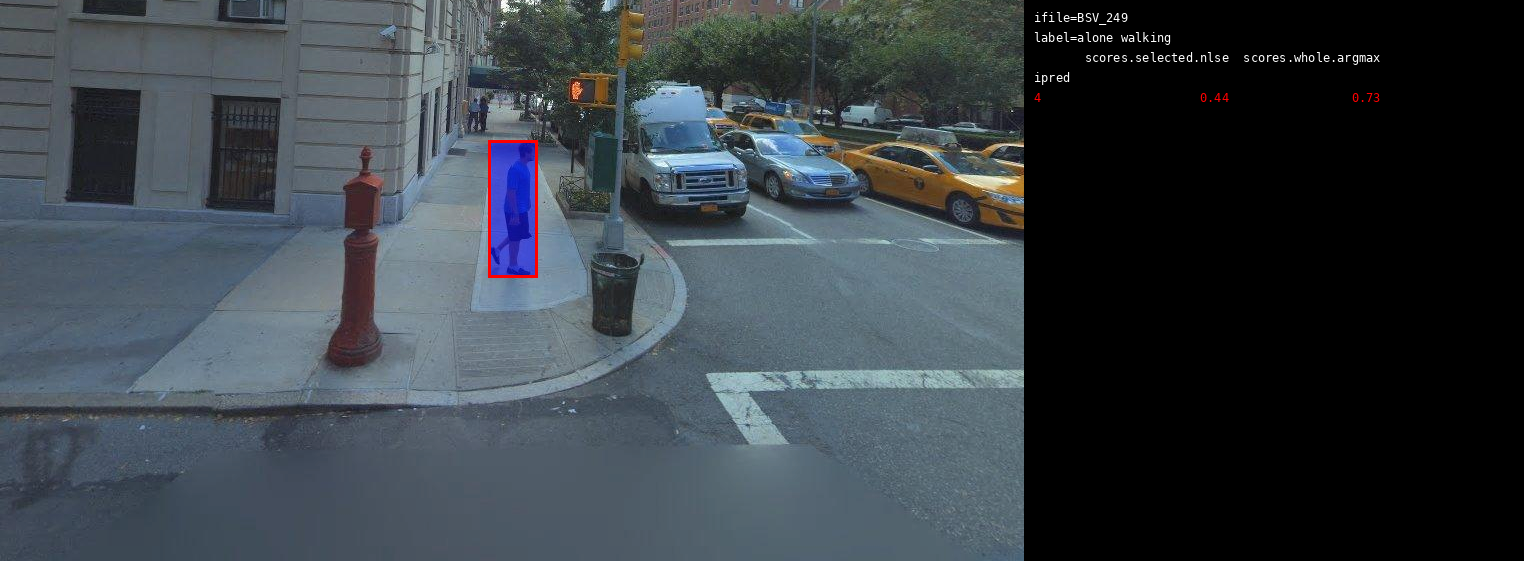

In [4]:
scored.view(
    file=4,
    prompt='a person walking',
    top=5,
)

We scored and concatenated the predictions, and viewed them. But for analytics, we need to generate a report of various statistics. For this we can use `elsa.report` :

#### Elsa.report
- *files:
    - Pass as many scored parquet files or directories of scored parquet files as you want to score.
    - For example, elsa.report('file1.parquet', 'file2.parquet', 'scored/directory') 
- outdir:
    - The output directory in which a subdirectory for each file will be created. For example, passing `gdino_nlse` results in a gdino_nlse directory.
- overwrite:
    - if True, existing CSV files will be overwritten before being concatenated to the final CSVs.
    - if False, existing CSV files are preserved before being concatenated to the final CSVs.
- metrics:
    - A list of which metrics to report on. For each metric, CSVs are generated, and then at the end of the iteration, those CSVs are concatenated.
- method_parameters:
    - A dictionary of method parameters. The key is the method name, and the value is a dictionary of parameters to pass to the method. For example, to change CDBA IOU threshold, pass `{'cdba': {'iou': .7}}`. Keep in mind that if you change the IOU for one method, you must also change it for the other methods to have a fair comparison

Your outputs will look something like this:
```
outdir/
    filename/
        method/
            score.csv

e.g.

outdir/
    gdino_swinB_zeroshot_whole_argmax/
        cdba/
            ap.csv
            ap.by_level.csv
        nms/
            ap.csv
            ap.by_level.csv

In [ ]:
# For example, to generate a report on GDINO predictions, we used the following code:
elsa.report(
    '/home/redacted/scored/gdino/gdino_swinT_zeroshot_scored_selected.nlse_0.3.parquet',
    '/home/redacted/scored/gdino/gdino_swinT_zeroshot_scored_whole.argmax_0.3.parquet',
    '/home/redacted/scored/gdino/gdino_swinT_tuned_scored_whole.argmax_0.3.parquet',
    '/home/redacted/scored/gdino/gdino_swinT_tuned_scored_selected.nlse_0.3.parquet',
)